<h1>Exercício 1</h1>
<BR>
<h2>

# Bibliotecas

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pca import pca

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
warnings.filterwarnings('ignore')


## Funções Auxiliares

In [2]:
def percentual_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) | (data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

def calculate_wcss(data, num):
        wcss = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss
    
def calculate_silhouete(data, num):
        silhouete_avg = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            cluster_labels = kmeans.labels_
            silhouete_avg.append(silhouette_score(data, cluster_labels))
    
        return silhouete_avg

def spider_plot_unico(data, cluster):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="polar")
    ax.plot(label_loc, means[cluster], label=f'class {categories[cluster]}')
    ax.set_title(f'Cluster {cluster}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.show()
    
def spider_plot(data):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(projection="polar")
    for i in range(len(means)):
        ax.plot(label_loc, means[i], label=f'class {categories[i]}')
        ax.set_title(f'Cluster {i}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend(loc="lower left")
    plt.show()
    
def spider_plot_YYY(data, cluster):
    means = data.groupby('kmeans').mean().to_numpy()
    names = data.columns[0:-1]
    means = np.c_[means, np.zeros(5)]
    names = np.r_[names, ['']]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection="polar")
    #for i in range(len(means)):
    ax.plot(label_loc, means[cluster], label=f'class {categories[cluster]}')
    ax.set_title(f'Cluster {cluster}', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    #plt.legend(loc="lower left")
    plt.show()    
    

# Carregando os Dados

## Vamos utilizar nesta análise a base montada no notebook de análise inicial do dados. Neste banco já estamos com os dados de DRE preenchidos e não temos dados nulos referentes a informações do DRE.

In [3]:

df = pd.read_csv("./df_pre_processado.csv")

In [4]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
anoFundacao                  float64   6012         0     0.000       66   
ativoCirculante              float64   6012         0     0.000     1794   
capitalSocial                float64   6012         0     0.000      298   
cnpjSemTraco                  object   6012         0     0.000     1523   
custos                       float64   6012         0     0.000     1703   
dashboardCorrelacao          float64   6012         0     0.000      519   
dataAprovadoEmComite          object    443      5569     0.926      443   
dataAprovadoNivelAnalista     object   4652      1360     0.226     4652   
definicaoRisco                object   6012         0     0.000        4   
diferencaPercentualRisco     float64   6012         0     0.000       77   
duplicatasAReceber           float64   6012         0     0.000     1668   
empresa_MeEppMei                bool   6012         0     0.000        2   
endividamento                float64   6012         0     0.000     1185   
estoque                      float64   6012         0     0.000     1674   
faturamentoBruto             float64   6012         0     0.000     2605   
intervaloFundacao             object   6012         0     0.000        4   
limiteEmpresaAnaliseCredito  float64   6012         0     0.000     1478   
maiorAtraso                    int64   6012         0     0.000      153   
margemBruta                  float64   6012         0     0.000     1860   
margemBrutaAcumulada         float64   6012         0     0.000     1200   
nomeFantasia                  object   6012         0     0.000     1470   
numero_solicitacao             int64   6012         0     0.000     6012   
passivoCirculante            float64   6012         0     0.000     1789   
percentualProtestos          float64   5045       967     0.161        2   
percentualRisco              float64   6012         0     0.000       79   
periodoBalanco                object   6012         0     0.000      124   
periodoDemonstrativoEmMeses  float64   6012         0     0.000       12   
prazoMedioRecebimentoVendas    int64   6012         0     0.000      149   
primeiraCompra                object   5945        67     0.011     1207   
razaoSocial                   object   6012         0     0.000     1490   
restricoes                      bool   6012         0     0.000        2   
scorePontualidade            float64   6012         0     0.000      285   
status                        object   6012         0     0.000        7   
titulosEmAberto              float64   6012         0     0.000      563   
totalAtivo                   float64   6012         0     0.000     1788   
totalPatrimonioLiquido       float64   6012         0     0.000     1759   
valorAprovado                float64   5095       917     0.153      287   
valorSolicitado              float64   6012         0     0.000      318   

                                                   min         25%        50%  \
anoFundacao                                     1000.0      2000.0     2008.5   
ativoCirculante                                  -17.0    529853.0  3230248.0   
capitalSocial                                      0.0     95400.0   200000.0   
cnpjSemTraco                        AADG56617962174727           -          -   
custos                                    -346633805.0         0.0  1723174.0   
dashboardCorrelacao                           -0.99999         0.0        0.0   
dataAprovadoEmComite                                 -           -          -   
dataAprovadoNivelAnalista                            -           -          -   
definicaoRisco               De 0 a 10 % - Muito Baixo           -          -   
diferencaPercentualRisco                      0.207547    0.679245   0.785714   
duplicatasAReceber                         -22780710.0         0.0   878819.0   
empresa_MeEppMei                                 False         0.0        0.0   
endividament

# Retirando as colunas que não iremos usar na análise de clusters

## Entendemos que a análise requisitada pela empresa WTC é para classificarmos os seus clientes em grupos com características comuns. Para tanto não necessitamos das informações da própria empresa, pois nestes dados já existe um julgamento da mesma sobre estes clientes.

In [5]:
df.drop(['valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'percentualProtestos', 'numero_solicitacao', 'prazoMedioRecebimentoVendas',
         'razaoSocial', 'nomeFantasia', 'anoFundacao', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao', 'passivoCirculante', 'ativoCirculante',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses', 'margemBruta'], axis=1, inplace=True)

<h2>
Vamos retirar todos os CNPJs duplicados, pois queremos formar clusters com CNPJs únicos.<BR>
Para esta análise vamos manter sempre a entrada mais atualizada (a última) do cliente.<BR>
</h2>

In [6]:
df.drop_duplicates(subset='cnpjSemTraco', keep='last', inplace=True)

In [7]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
capitalSocial                float64   1523         0       0.0      284   
cnpjSemTraco                  object   1523         0       0.0     1523   
custos                       float64   1523         0       0.0     1033   
duplicatasAReceber           float64   1523         0       0.0     1042   
empresa_MeEppMei                bool   1523         0       0.0        2   
endividamento                float64   1523         0       0.0      636   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   
maiorAtraso                    int64   1523         0       0.0      153   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
percentualRisco              float64   1523         0       0.0       63   
restricoes                      bool   1523         0       0.0        2   
scorePontualidade            float64   1523         0       0.0      285   
titulosEmAberto              float64   1523         0       0.0      563   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   

                                            min        25%        50%  \
capitalSocial                               0.0    80000.0   150000.0   
cnpjSemTraco                 AADG56617962174727          -          -   
custos                                -431401.0        0.0  1565850.0   
duplicatasAReceber                  -22780710.0        0.0   567455.0   
empresa_MeEppMei                          False        0.0        0.0   
endividamento                               0.0        0.0        0.0   
estoque                                     0.0     8667.5   605595.0   
faturamentoBruto                            0.0  1672928.5  4925896.0   
limiteEmpresaAnaliseCredito                 0.0     9900.0    72600.0   
maiorAtraso                                   0        0.0        5.0   
margemBrutaAcumulada                        0.0   0.220215   0.386633   
percentualRisco                             0.0   0.142857   0.214286   
restricoes                                False        0.0        0.0   
scorePontualidade                           0.0   0.791796        1.0   
titulosEmAberto                             0.0        0.0        0.0   
totalAtivo                                  0.0   364756.0  2846875.0   
totalPatrimonioLiquido             -186719734.0    49100.5  1101916.0   

                                    75%                 max             mean  \
capitalSocial                  600000.0        4100000000.0  16456989.209455   
cnpjSemTraco                          -  ZZVU59020803434073                -   
custos                        8736359.0        4393536000.0  41907151.246225   
duplicatasAReceber            3720666.0       20093580000.0  24822958.860801   
empresa_MeEppMei                    1.0                True         0.317137   
endividamento                  410269.0         740631476.0   4856513.224557   
estoque                       3524299.0        1293428000.0  12406042.209455   
faturamentoBruto             21466386.0        6426115000.0  75644114.824688   
limiteEmpresaAnaliseCredito    585091.0        1974261312.0   4148168.915955   
maiorAtraso                        20.0                 977         23.12541   
margemBrutaAcumulada           0.494708                 1.0         0.340131   
percentualRisco                0.303571            0.660714          0.22248   
restricoes                          0.0                True          0.09849   
scorePontualidade                   1.0                 1.0         0.763521   
titulosEmAberto                  9940.0           2836656.0     40928.155936   
totalAtivo                   12919622.0       54823500000.0  96027

In [8]:
df_num = df.drop(['cnpjSemTraco'], axis=1)

## Transformando as variáveis booleanas em númericas. 

In [9]:

#df_num.restricoes = df_num.restricoes.apply(lambda x:1 if x else 0)
#df_num.empresa_MeEppMei = df_num.empresa_MeEppMei.apply(lambda x:1 if x else 0)
df_num.drop(['restricoes', 'empresa_MeEppMei', 'scorePontualidade'], axis=1, inplace=True)


In [10]:
explore(df_num)

dtypes  count  null_sum  null_pct  nunique  \
maiorAtraso                    int64   1523         0       0.0      153   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
titulosEmAberto              float64   1523         0       0.0      563   
percentualRisco              float64   1523         0       0.0       63   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   
endividamento                float64   1523         0       0.0      636   
duplicatasAReceber           float64   1523         0       0.0     1042   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
custos                       float64   1523         0       0.0     1033   
capitalSocial                float64   1523         0       0.0      284   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   

                                     min          25%          50%  \
maiorAtraso                          0.0        0.000        5.000   
margemBrutaAcumulada                 0.0        0.220        0.387   
titulosEmAberto                      0.0        0.000        0.000   
percentualRisco                      0.0        0.143        0.214   
totalAtivo                           0.0   364756.000  2846875.000   
totalPatrimonioLiquido      -186719734.0    49100.500  1101916.000   
endividamento                        0.0        0.000        0.000   
duplicatasAReceber           -22780710.0        0.000   567455.000   
estoque                              0.0     8667.500   605595.000   
faturamentoBruto                     0.0  1672928.500  4925896.000   
custos                         -431401.0        0.000  1565850.000   
capitalSocial                        0.0    80000.000   150000.000   
limiteEmpresaAnaliseCredito          0.0     9900.000    72600.000   

                                      75%           max          mean  \
maiorAtraso                  2.000000e+01  9.770000e+02  2.312500e+01   
margemBrutaAcumulada         4.950000e-01  1.000000e+00  3.400000e-01   
titulosEmAberto              9.940000e+03  2.836656e+06  4.092816e+04   
percentualRisco              3.040000e-01  6.610000e-01  2.220000e-01   
totalAtivo                   1.291962e+07  5.482350e+10  9.602702e+07   
totalPatrimonioLiquido       5.735235e+06  1.292328e+10  3.247566e+07   
endividamento                4.102690e+05  7.406315e+08  4.856513e+06   
duplicatasAReceber           3.720666e+06  2.009358e+10  2.482296e+07   
estoque                      3.524299e+06  1.293428e+09  1.240604e+07   
faturamentoBruto             2.146639e+07  6.426115e+09  7.564411e+07   
custos                       8.736359e+06  4.393536e+09  4.190715e+07   
capitalSocial                6.000000e+05  4.100000e+09  1.645699e+07   
limiteEmpresaAnaliseCredito  5.850910e+05  1.974261e+09  4.148169e+06   

                                  median           std    skew  
maiorAtraso                        5.000  6.099000e+01   7.657  
margemBrutaAcumulada               0.387  2.110000e-01  -0.448  
titulosEmAberto                    0.000  1.765397e+05   8.188  
percentualRisco                    0.214  1.190000e-01   0.635  
totalAtivo                   2846875.000  1.512397e+09  32.449  
totalPatrimonioLiquido       1101916.000  4.124506e+08  26.956  
endividamento                      0.000  4.170180e+07  14.833  
duplicatasAReceber            567455.000  5.214265e+08  37.596  
estoque                       605595.000  7.614312e+07  12.385  
faturamentoBruto             4925896.000  4.089853e+08  10.747  
custos                       1565850.000  2.599065e+08  12.264  
capitalSocial                 150000.000  1.488103e+08  18.616  
limiteEmpresaAnaliseCredito    72600.000  5.304007e+07  34.071

In [11]:
fig = px.box(data_frame = df_num, height=600, title='Banco de Dados Original')
fig.show()

## Como podemos ver no Boxplot acima temos diversos valores outliers. Como iremos fazer uma análise de clusterização que leva em conta as distancias entre os dados estes outliers podem atrapalhar o resultado final, pois no gráfico nem é possível ver o boxplot corretamente.<BR>
## Para visualizarmos melhor vamos calcular o percentual de dados acima e abaixo dos limites inferior e superior, respctivamente, do gráfico boxplot.

In [12]:
for coluna in df_num.columns:
    data = df_num[coluna]
    perc = str(round(percentual_outlier(data), 2))
    print(f'Outliers na coluna {coluna} : {perc}%')

Outliers na coluna maiorAtraso : 11.1%
Outliers na coluna margemBrutaAcumulada : 0.13%
Outliers na coluna titulosEmAberto : 17.07%
Outliers na coluna percentualRisco : 1.12%
Outliers na coluna totalAtivo : 13.72%
Outliers na coluna totalPatrimonioLiquido : 13.99%
Outliers na coluna endividamento : 18.25%
Outliers na coluna duplicatasAReceber : 14.71%
Outliers na coluna estoque : 13.13%
Outliers na coluna faturamentoBruto : 14.31%
Outliers na coluna custos : 15.5%
Outliers na coluna capitalSocial : 15.56%
Outliers na coluna limiteEmpresaAnaliseCredito : 16.74%


In [13]:
mmsc = MinMaxScaler().fit(df_num)
df_mmsc = pd.DataFrame(mmsc.transform(df_num), columns=df_num.columns)
df_mmsc

maiorAtraso  margemBrutaAcumulada  titulosEmAberto  percentualRisco  \
0        0.002047              0.000000         0.000000         0.428353   
1        0.007165              0.387733         0.003655         0.428353   
2        0.019447              0.000000         0.000000         0.485467   
3        0.028659              0.000000         0.000000         0.542580   
4        0.000000              0.385918         0.000000         0.428353   
...           ...                   ...              ...              ...   
1518     0.004094              0.536739         0.002399         0.378378   
1519     0.018424              0.374573         0.031830         0.216216   
1520     0.000000              0.462250         0.000000         0.405405   
1521     0.065507              0.426652         0.449989         0.216216   
1522     0.018424              0.490166         0.011728         0.189189   

      totalAtivo  totalPatrimonioLiquido  endividamento  duplicatasAReceber  \
0       0.000008                0.014256       0.000000            0.001132   
1       0.000011                0.014278       0.000000            0.001139   
2       0.000013                0.014349       0.000000            0.001165   
3       0.000087                0.014585       0.000000            0.001292   
4       0.000017                0.014277       0.000000            0.001132   
...          ...                     ...            ...                 ...   
1518    0.000370                0.014387       0.000101            0.001693   
1519    0.000103                0.014312       0.001697            0.001305   
1520    0.000000                0.014243       0.000000            0.001132   
1521    0.000746                0.016196       0.000062            0.001917   
1522    0.000070                0.014451       0.000000            0.001255   

       estoque  faturamentoBruto    custos  capitalSocial  \
0     0.000155          0.000097  0.000000       0.000010   
1     0.000164          0.000183  0.000098       0.000012   
2     0.000000          0.000194  0.000595       0.000024   
3     0.000924          0.000835  0.000570       0.000122   
4     0.000479          0.000089  0.000098       0.000020   
...        ...               ...       ...            ...   
1518  0.004421          0.020740  0.020278       0.000203   
1519  0.001018          0.000760  0.000682       0.000007   
1520  0.000000          0.000839  0.001269       0.000027   
1521  0.011786          0.018627  0.018559       0.000488   
1522  0.000690          0.000731  0.000588       0.000068   

      limiteEmpresaAnaliseCredito  
0                        0.000005  
1                        0.000022  
2                        0.000084  
3                        0.000098  
4                        0.000032  
...                           ...  
1518                     0.003647  
1519                     0.000030  
1520                     0.000002  
1521                     0.005487  
1522                     0.000026  

[1523 rows x 13 columns]

<AxesSubplot:>

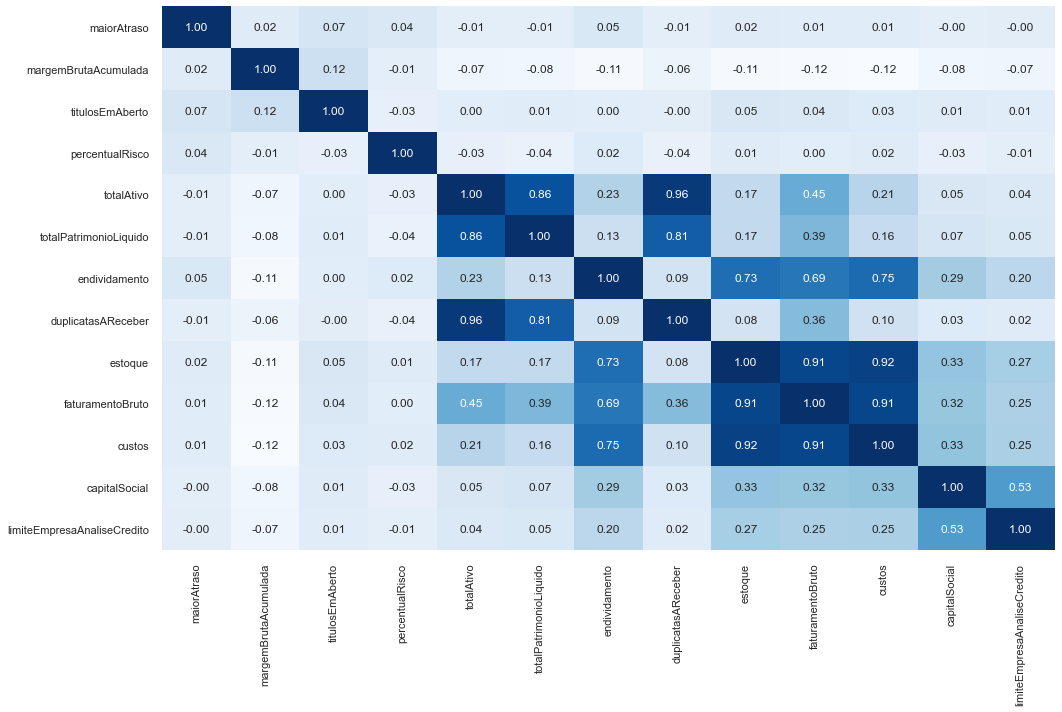

In [14]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(df_mmsc.corr(), cmap='Blues', annot=True, cbar=False, fmt='0.2f')

# PCA

In [15]:
pca = PCA(n_components=13, svd_solver='full', random_state=42)
pca.fit(df_mmsc)
PCA_labels = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
df_pca = pd.DataFrame(pca.transform(df_mmsc), columns=PCA_labels)
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.340251  0.078908 -0.052003 -0.014997  0.013951 -0.003235 -0.004250   
1     0.045438  0.092967 -0.016694 -0.020920  0.003055 -0.000186 -0.001214   
2    -0.342222  0.136277 -0.051912 -0.002131  0.003895 -0.001962 -0.003484   
3    -0.344276  0.193500 -0.051422  0.004455 -0.000897 -0.000764 -0.002832   
4     0.043457  0.092804 -0.017040 -0.028691  0.004900 -0.000479 -0.001320   
...        ...       ...       ...       ...       ...       ...       ...   
1518  0.193131  0.048492  0.020747 -0.029578 -0.000797  0.001868 -0.000479   
1519  0.040782 -0.119439 -0.012805  0.007729  0.013583 -0.002826 -0.003422   
1520  0.120099  0.072639 -0.009207 -0.030962  0.002407 -0.000110 -0.000990   
1521  0.106114 -0.119871  0.035097  0.308960  0.301842 -0.003895 -0.004519   
1522  0.156014 -0.142126 -0.003940 -0.008566 -0.005283 -0.001629 -0.002181   

           PC8       PC9      PC10      PC11      PC12      PC13  
0     0.000379 -0.000038  0.000779 -0.001024 -0.000810  0.000164  
1     0.001482  0.000151  0.000254  0.000340 -0.000736  0.000009  
2    -0.000487 -0.000191  0.000285 -0.000628 -0.000807  0.000079  
3    -0.001279 -0.000318  0.000930 -0.000758 -0.000866  0.000088  
4     0.001576  0.000191  0.000570  0.000363 -0.000907  0.000045  
...        ...       ...       ...       ...       ...       ...  
1518 -0.008748  0.001694 -0.011690  0.000388  0.005035 -0.001421  
1519  0.003133  0.000639 -0.000238  0.000124 -0.000905 -0.000045  
1520  0.001501  0.000114 -0.000648  0.000764 -0.000490 -0.000113  
1521  0.005025  0.004342 -0.012124  0.003598  0.001411 -0.001721  
1522  0.001382  0.000603 -0.000270  0.000498 -0.000781  0.000044  

[1523 rows x 13 columns]

In [16]:
n_pcs = pca.n_components
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_mmsc.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df_teste = pd.DataFrame(dic.items(), columns=['Component', 'Feature'])
df_teste['Variance'] = np.round(pca.explained_variance_ratio_*100, 2)
df_teste['accumulated'] = df_teste.Variance.cumsum()
df_teste


Component                      Feature  Variance  accumulated
0        PC0         margemBrutaAcumulada     43.45        43.45
1        PC1              percentualRisco     31.37        74.82
2        PC2             faturamentoBruto     12.07        86.89
3        PC3                  maiorAtraso      3.96        90.85
4        PC4              titulosEmAberto      3.47        94.32
5        PC5       totalPatrimonioLiquido      2.20        96.52
6        PC6                capitalSocial      1.34        97.86
7        PC7                endividamento      1.12        98.98
8        PC8  limiteEmpresaAnaliseCredito      0.41        99.39
9        PC9                      estoque      0.28        99.67
10      PC10       totalPatrimonioLiquido      0.21        99.88
11      PC11             faturamentoBruto      0.12       100.00
12      PC12                   totalAtivo      0.01       100.01

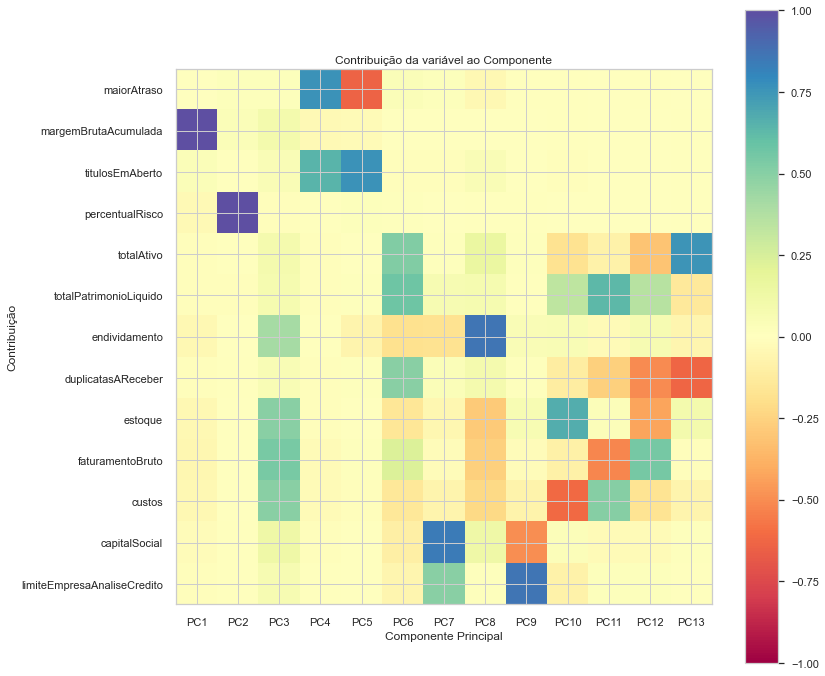

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap="Spectral", vmin=-1, vmax=1)
plt.yticks(range(len(df_mmsc.columns)), df_mmsc.columns)
plt.xticks(range(len(df_pca.columns)), df_pca.columns)
plt.xlabel("Componente Principal")
plt.ylabel("Contribuição")
plt.title("Contribuição da variável ao Componente")
plt.colorbar()

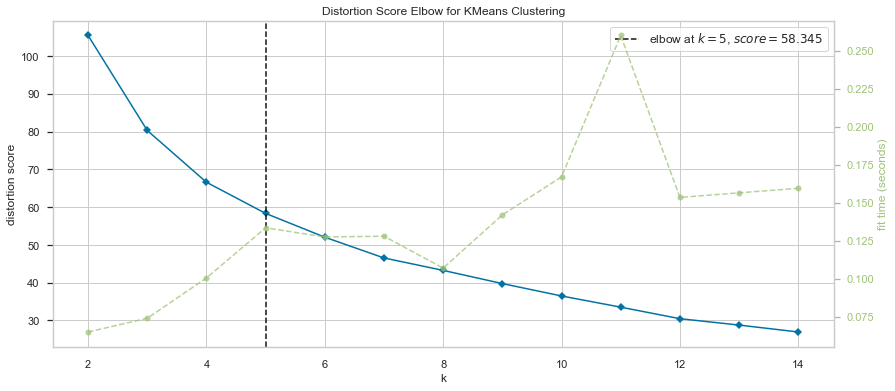

In [18]:
fig = plt.figure(figsize=(14,6))

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,15))

distortion_visualizer.fit(df_mmsc)       
distortion_visualizer.show()
plt.show()

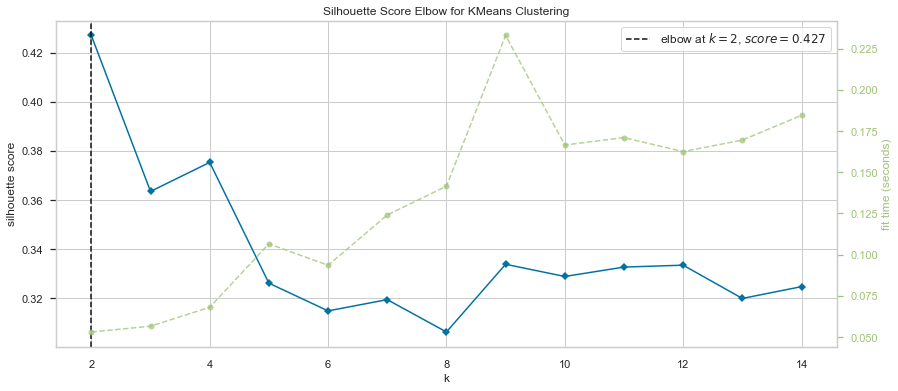

In [19]:
fig = plt.figure(figsize=(14,6))

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, metric='silhouette',k=(2,15))

distortion_visualizer.fit(df_mmsc)       
distortion_visualizer.show()
plt.show()

In [20]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, algorithm='full', random_state=42)
km_labels = km.fit_predict(df_mmsc)

In [21]:
df_num['kmeans'] = km_labels
df_mmsc['kmeans'] = km_labels
df_pca['kmeans'] = km_labels
df['kmeans'] = km_labels

In [22]:
df.groupby('kmeans').maiorAtraso.count()

kmeans
0    396
1    346
2    455
3    317
4      9
Name: maiorAtraso, dtype: int64

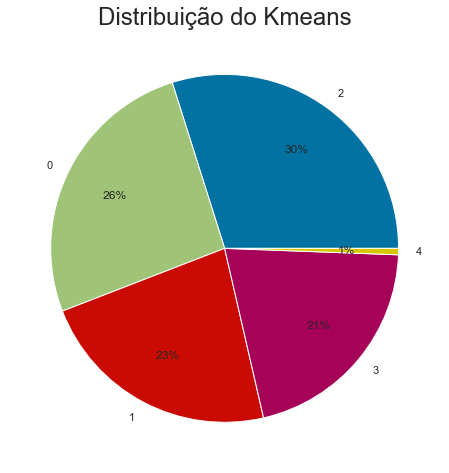

In [23]:
fig = plt.figure(figsize=(8,8))
df.kmeans.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)
plt.title('Distribuição do Kmeans', size=24)
plt.ylabel("")
plt.show()

In [73]:
with pd.ExcelWriter("df_ex1_excel.xlsx") as writer:
    df.to_excel(writer)

In [74]:
#km_centroides = pd.DataFrame(mmsc.inverse_transform(pca.inverse_transform(km.cluster_centers_)))
km_centroides = pd.DataFrame(mmsc.inverse_transform(km.cluster_centers_))
km_centroides

0             1             2         3             4   \
0  19.212121  5.552564e-01  5.921485e+04  0.186465  4.136393e+07   
1  15.199422  1.120357e-02  5.262880e+02  0.219624  2.261777e+08   
2  31.153846  3.579131e-01  6.134978e+04  0.143615  2.503966e+07   
3  24.536278  4.145452e-01  3.403236e+04  0.382047  1.082471e+07   
4  44.444444  5.551115e-17  4.920814e-12  0.283730  4.087452e+09   

             5             6             7             8             9   \
0  1.829431e+07  2.533204e+06  8.355144e+06  9.778727e+06  5.999845e+07   
1  8.419959e+07  3.095617e+06  6.932649e+07  1.153725e+07  8.102466e+07   
2  1.119868e+07  1.839253e+06  7.214804e+06  6.849538e+06  4.496287e+07   
3  3.217270e+06  1.143173e+06  2.505522e+06  2.482773e+06  2.264390e+07   
4  7.741715e+08  4.581102e+08  7.147530e+08  7.918398e+08  3.975094e+09   

             10            11            12  
0  2.799309e+07  9.505950e+06  2.165161e+06  
1  4.229570e+07  2.517423e+07  7.994950e+06  
2  2.304434e+07  5.728596e+06  2.292762e+06  
3  8.617533e+06  7.361413e+06  8.326958e+05  
4  2.765343e+09  8.499194e+08  1.540926e+08

In [75]:
with pd.ExcelWriter("Kmeans_centroides.xlsx") as writer:
    km_centroides.to_excel(writer)
    
df.to_csv("./df_ex1.csv", index=False)        

In [76]:
matriz = np.empty(km_centroides.shape)

for idc in range(km_centroides.shape[0]):
    for idx in range(km_centroides.shape[1]):
        num = [x for x in df_num.iloc[:,idx] if x < km_centroides.iloc[idc,idx]]
        num = round((len(num) / df_num.shape[0] *100), 2)
        matriz[idc,idx] = num
    

In [77]:
df_percentual = pd.DataFrame(matriz, columns=df_num.drop(['kmeans'], axis=1).columns)
df_percentual

maiorAtraso  margemBrutaAcumulada  titulosEmAberto  percentualRisco  \
0        74.39                 85.69            90.48            40.64   
1        68.88                 21.34            62.44            53.91   
2        83.72                 43.86            90.68            33.62   
3        79.71                 56.27            85.95            89.56   
4        87.72                 21.21            62.38            70.91   

   totalAtivo  totalPatrimonioLiquido  endividamento  duplicatasAReceber  \
0       88.51                   88.51          88.05               83.91   
1       96.19                   96.26          89.10               97.05   
2       83.32                   84.04          85.69               82.01   
3       72.36                   67.50          82.47               69.47   
4       99.80                   99.28          99.67               99.80   

   estoque  faturamentoBruto  custos  capitalSocial  \
0    87.39             87.72   86.87          94.55   
1    88.90             90.22   90.28          96.39   
2    83.65             84.64   85.16          93.30   
3    69.40             75.64   74.79          94.16   
4    99.80             99.74   99.74          99.54   

   limiteEmpresaAnaliseCredito  
0                        85.69  
1                        93.63  
2                        86.08  
3                        78.92  
4                        99.74

In [45]:
with pd.ExcelWriter("Kmeans_percentual.xlsx") as writer:
    df_percentual.to_excel(writer)

# Avaliação do Modelo

Vamos usar duas métricas para avaliar o modelo, e depois analisar algugns gráficos

The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.
The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

In [122]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca, km_labels)}')
print(f'Silhouette Score = {silhouette_score(df_pca, km_labels)}')

Davies-Bouldin index = 0.2430952499928764
Silhouette Score = 0.8321200073303329


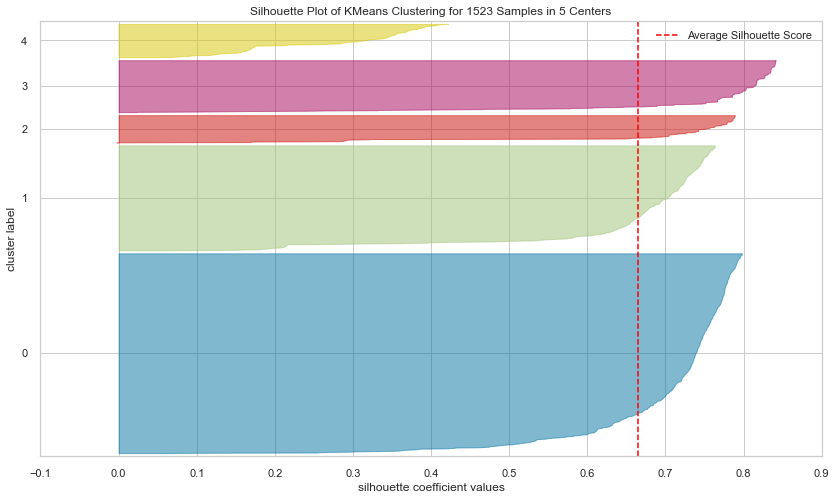

In [47]:
fig = plt.figure(figsize=(14,8))

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_mmsc.drop(['kmeans'],axis=1))
visualizer.show()
plt.show()

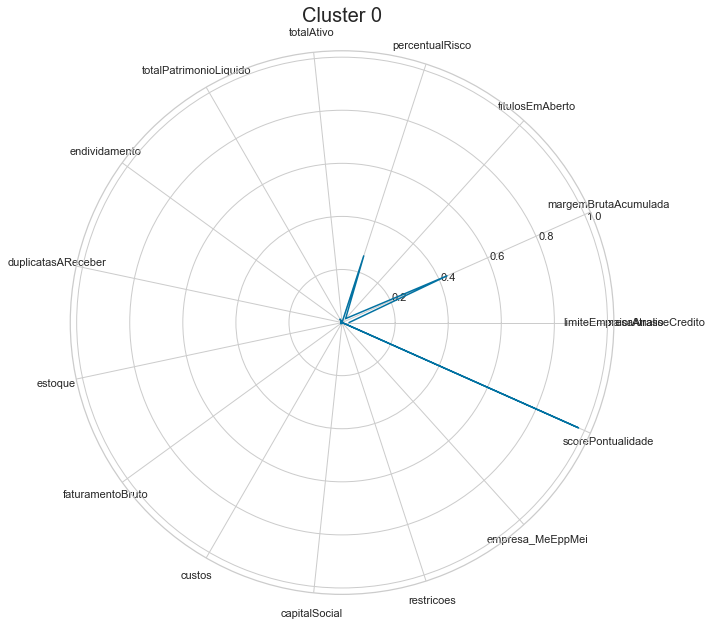

In [48]:
spider_plot_unico(df_mmsc, 0)

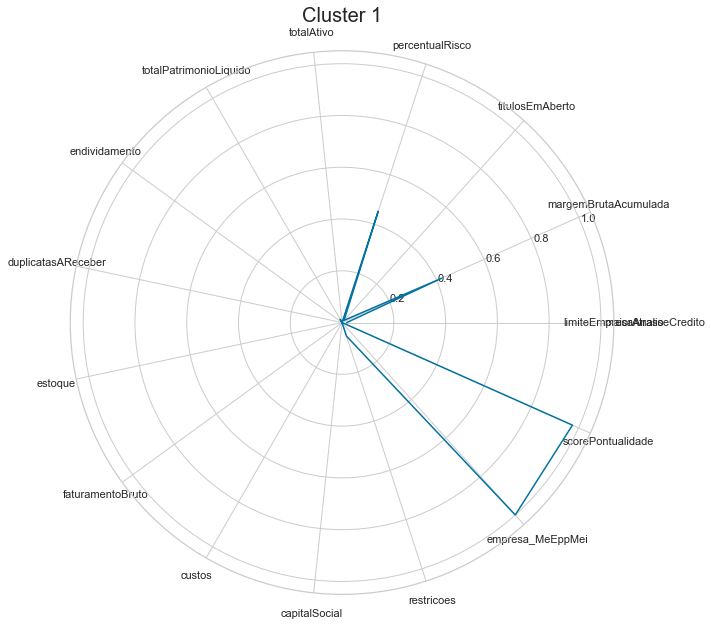

In [49]:
spider_plot_unico(df_mmsc, 1)

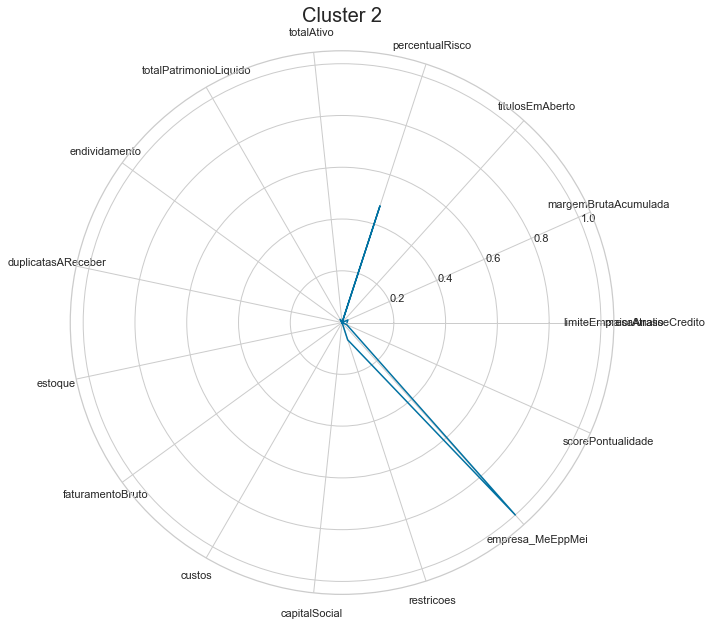

In [50]:
spider_plot_unico(df_mmsc, 2)

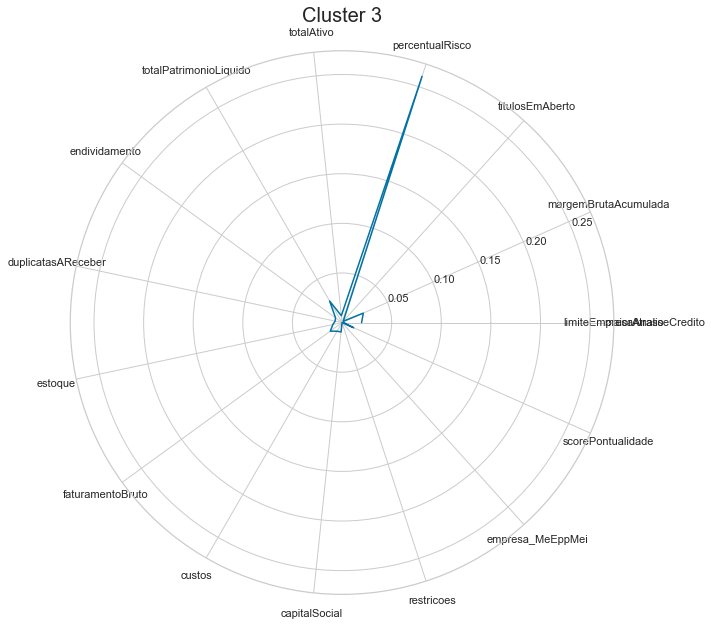

In [51]:
spider_plot_unico(df_mmsc, 3)

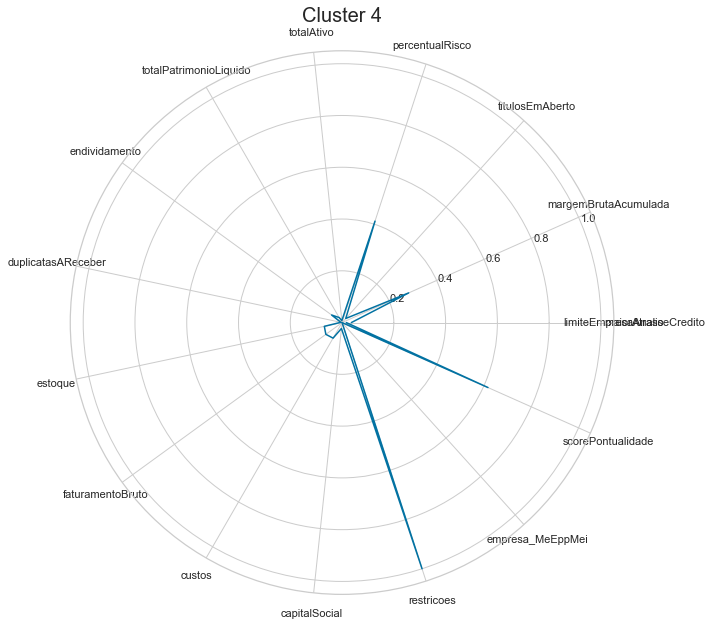

In [52]:
spider_plot_unico(df_mmsc, 4)